In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

In [4]:
credito = pd.read_excel('../4_22/Limite_Credito_Dummy.xlsx')

In [5]:
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Regiao,Gênero,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [10]:
le = LabelEncoder()
le.fit(credito.Gênero)
credito.Gênero = le.transform(credito.Gênero)
le.fit(credito.Escolaridade)
credito.Escolaridade = le.transform(credito.Escolaridade)
le.fit(credito.Regiao)
credito.Regiao = le.transform(credito.Regiao)

In [11]:
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Regiao,Gênero,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


<AxesSubplot:xlabel='LimitedoChequeEspecial', ylabel='Count'>

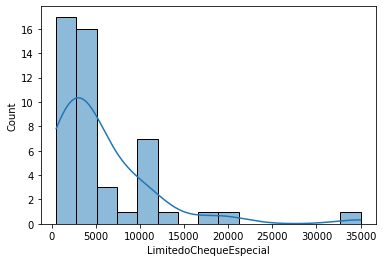

In [13]:
sns.histplot(credito.LimitedoChequeEspecial, kde=True)

<AxesSubplot:xlabel='Idade', ylabel='Count'>

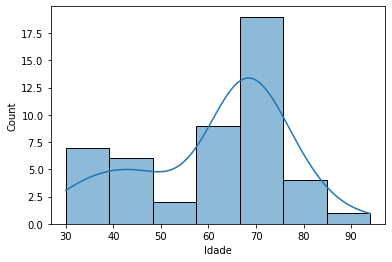

In [14]:
sns.histplot(credito.Idade, kde=True)

In [15]:
credito.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Regiao,Gênero,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


In [16]:
scaler = MinMaxScaler()
credito_norm = pd.DataFrame(scaler.fit_transform(credito), columns=credito.columns, index=credito.index)
credito_norm.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Regiao,Gênero,LimitedoChequeEspecial
0,0.625000,0.083911,0.023518,0.018987,0.0,0.0,0.0,0.000000
1,0.593750,0.009126,0.019278,0.012658,0.0,0.0,0.0,0.002899
2,0.218750,0.019557,0.035128,0.050633,0.0,0.0,0.0,0.008696
3,0.656250,0.000000,0.005409,0.525316,0.0,0.0,0.0,0.014493
4,0.703125,0.001304,0.007390,0.841772,0.0,0.0,0.0,0.014493


In [17]:
credito_norm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Regiao,Gênero,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
formula = ('LimitedoChequeEspecial ~ Idade + Gênero + Escolaridade + Regiao + Salario+LimitedeCreditoImediato+RendimentoTotal')
modelo = smf.ols(formula=formula, data=credito_norm).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Fri, 19 May 2023   Prob (F-statistic):           7.44e-17
Time:                            21:39:28   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0321      0.028     -1.129      0.266      -0.089       0.025
Idade                      -0.0093      0.042     -0.220      0.827      -0.094       0.076
Gênero                      0.0960      0.030      3.153      0.003       0.034       0.158
Escolaridade                0.0245      0.028      0.867      0.391      -0.033       0.082
Regiao                      0.0676      0.023      2.974      0.005       0.022       0.114
Salario                     0.4095      0.207      1.977      0.055      -0.009       0.828
LimitedeCreditoImediato     0.0223      0.038      0.589      0.559      -0.054       0.099
RendimentoTotal             0.3010      0.225      1.336      0.189      -0.154       0.756
==============================================================================
Omnibus:                       15.742   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.550
Skew:                          -0.679   Prob(JB):                     9.50e-10
Kurtosis:                       7.351   Cond. No.                         49.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
formula = ('LimitedoChequeEspecial ~  Gênero + Escolaridade + Regiao + Salario+LimitedeCreditoImediato+RendimentoTotal')
modelo = smf.ols(formula=formula, data=credito_norm).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Fri, 19 May 2023   Prob (F-statistic):           9.97e-18
Time:                            21:42:13   Log-Likelihood:                 67.299
No. Observations:                      48   AIC:                            -120.6
Df Residuals:                          41   BIC:                            -107.5
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0357      0.023     -1.564      0.126      -0.082       0.010
Gênero                      0.0957      0.030      3.183      0.003       0.035       0.156
Escolaridade                0.0244      0.028      0.872      0.388      -0.032       0.081
Regiao                      0.0667      0.022      3.019      0.004       0.022       0.111
Salario                     0.4155      0.203      2.048      0.047       0.006       0.825
LimitedeCreditoImediato     0.0221      0.037      0.589      0.559      -0.054       0.098
RendimentoTotal             0.2924      0.219      1.334      0.190      -0.150       0.735
==============================================================================
Omnibus:                       15.771   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.413
Skew:                          -0.684   Prob(JB):                     1.02e-09
Kurtosis:                       7.340   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
formula = ('LimitedoChequeEspecial ~ Gênero + Escolaridade + Regiao + Salario+RendimentoTotal')
modelo = smf.ols(formula=formula, data=credito_norm).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Fri, 19 May 2023   Prob (F-statistic):           1.39e-18
Time:                            21:42:49   Log-Likelihood:                 67.097
No. Observations:                      48   AIC:                            -122.2
Df Residuals:                          42   BIC:                            -111.0
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0267      0.017     -1.590      0.119      -0.060       0.007
Gênero              0.1039      0.026      3.939      0.000       0.051       0.157
Escolaridade        0.0228      0.028      0.828      0.413      -0.033       0.079
Regiao              0.0686      0.022      3.160      0.003       0.025       0.112
Salario             0.4296      0.200      2.149      0.037       0.026       0.833
RendimentoTotal     0.2689      0.214      1.257      0.216      -0.163       0.701
==============================================================================
Omnibus:                       18.013   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.309
Skew:                          -0.774   Prob(JB):                     2.66e-12
Kurtosis:                       7.925   Cond. No.                         41.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
formula = ('LimitedoChequeEspecial ~ Gênero + Regiao + Salario+RendimentoTotal')
modelo = smf.ols(formula=formula, data=credito_norm).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.883
Model:                                OLS   Adj. R-squared:                  0.872
Method:                     Least Squares   F-statistic:                     80.75
Date:                    Fri, 19 May 2023   Prob (F-statistic):           2.02e-19
Time:                            21:43:21   Log-Likelihood:                 66.709
No. Observations:                      48   AIC:                            -123.4
Df Residuals:                          43   BIC:                            -114.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0286      0.017     -1.731      0.091      -0.062       0.005
Gênero              0.1166      0.021      5.450      0.000       0.073       0.160
Regiao              0.0743      0.020      3.631      0.001       0.033       0.116
Salario             0.4739      0.192      2.469      0.018       0.087       0.861
RendimentoTotal     0.2291      0.208      1.103      0.276      -0.190       0.648
==============================================================================
Omnibus:                       21.294   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.346
Skew:                          -0.973   Prob(JB):                     6.46e-15
Kurtosis:                       8.374   Cond. No.                         38.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
formula = ('LimitedoChequeEspecial ~ Gênero + Regiao + Salario -1')
modelo = smf.ols(formula=formula, data=credito_norm).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Fri, 19 May 2023   Prob (F-statistic):                    2.56e-25
Time:                            21:44:17   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Gênero         0.0938      0.018      5.339      0.000       0.058       0.129
Regiao         0.0497      0.016      3.019      0.004       0.017       0.083
Salario        0.6801      0.061     11.241      0.000       0.558       0.802
==============================================================================
Omnibus:                       10.368   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               28.212
Skew:                          -0.066   Prob(JB):                     7.48e-07
Kurtosis:                       6.753   Cond. No.                         5.47
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
x = credito_norm[['Gênero', 'Regiao', 'Salario']]
y = credito_norm[['LimitedoChequeEspecial']]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(x_treino, y_treino)
lr.fit(x,y)
LinearRegression()
r_sq = lr.score(x, y)
r_sq

0.8791882143098557

In [38]:
y_pred_treino = lr.predict(x_treino)
y_pred_teste = lr.predict(x_teste)
print('MAE: ', metrics.mean_absolute_error(y_treino, y_pred_treino))
print('MSE: ', metrics.mean_squared_error(y_treino, y_pred_treino))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))


MAE:  0.03535260038720454
MSE:  0.002412251042340313
RMSE:  0.04911467237333782


In [39]:
print('MAE: ', metrics.mean_absolute_error(y_teste, y_pred_teste))
print ('MSE: ', metrics.mean_squared_error(y_teste, y_pred_teste))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE:  0.0654304428705633
MSE:  0.008770831909357948
RMSE:  0.09365271971148488
